In [4]:
import requests
import matplotlib.pyplot as plt

In [5]:
# Define the desired date
date = '2022-01-01'  # Replace with your desired date in YYYY-MM-DD format

# Create the URL for the specific date
url = f"https://api.data.gov.sg/v1/environment/rainfall?date={date}"

# Create the URL to get station list
locations_url = f"https://api.data.gov.sg/v1/environment/rainfall"

# Fetch specific date data from the API
response = requests.get(url)
data = response.json()

# Fetch locations list from the API
locations_response = requests.get(locations_url)
locations_list = locations_response.json()['metadata']['stations']

In [6]:
# Extract station names, rainfall values, and dates
stations = data['metadata']['stations']

# create dictionary of stations and total rainfall
station_dict = {}
for station in stations:
    station_id = station['id']
    station_dict[station_id] = [station['name'], 0]

items = data['items']

In [7]:
# get total rainfall on that day
for timestamp in items:
    all_station_readings = timestamp['readings']
    for station in all_station_readings:
        station_id = station['station_id']
        station_value = station['value']
        station_dict[station_id][1] += station_value

In [8]:
# Prepare lists for locations and rainfall values
locations = []
rainfall_values = []
for reading in station_dict.values():

    if reading[0][0] == 'S' and reading[0][1].isdigit():
        flag = 0
        for station_object in locations_list:
            if station_object['id'] == reading[0]:
                flag = 1
                locations.append(station_object['name'])
                break
        if flag == 0:
            continue
    else:
        print(f"no match - {reading[0]}")
        locations.append(reading[0])
    rainfall_values.append(reading[1])

no match - Alexandra Road
no match - Ang Mo Kio Avenue 5
no match - Bukit Timah Road
no match - Choa Chu Kang Avenue 4
no match - Clementi Road
no match - East Coast Parkway
no match - GEYLANG EAST CENTRAL
no match - Handy Road
no match - Holland Road
no match - Jurong Pier Road
no match - Kent Ridge Road
no match - Kim Chuan Road
no match - Kranji Way
no match - Lim Chu Kang Road
no match - Mandai Lake Road
no match - Marina Gardens Drive
no match - Marine Parade Road
no match - Nanyang Avenue
no match - Nicoll Highway
no match - Old Choa Chu Kang Road
no match - Pasir Ris Street 51
no match - Poole Road
no match - Punggol Central
no match - Seletar Aerospace View
no match - Simei Avenue
no match - Somerset Road
no match - Toa Payoh North
no match - Towner Road
no match - Tuas Road
no match - Tuas South Avenue 3
no match - Tuas West Road
no match - Upper Changi Road North
no match - Upper Thomson Road
no match - West Coast Highway
no match - Woodlands Avenue 9
no match - Woodlands Roa

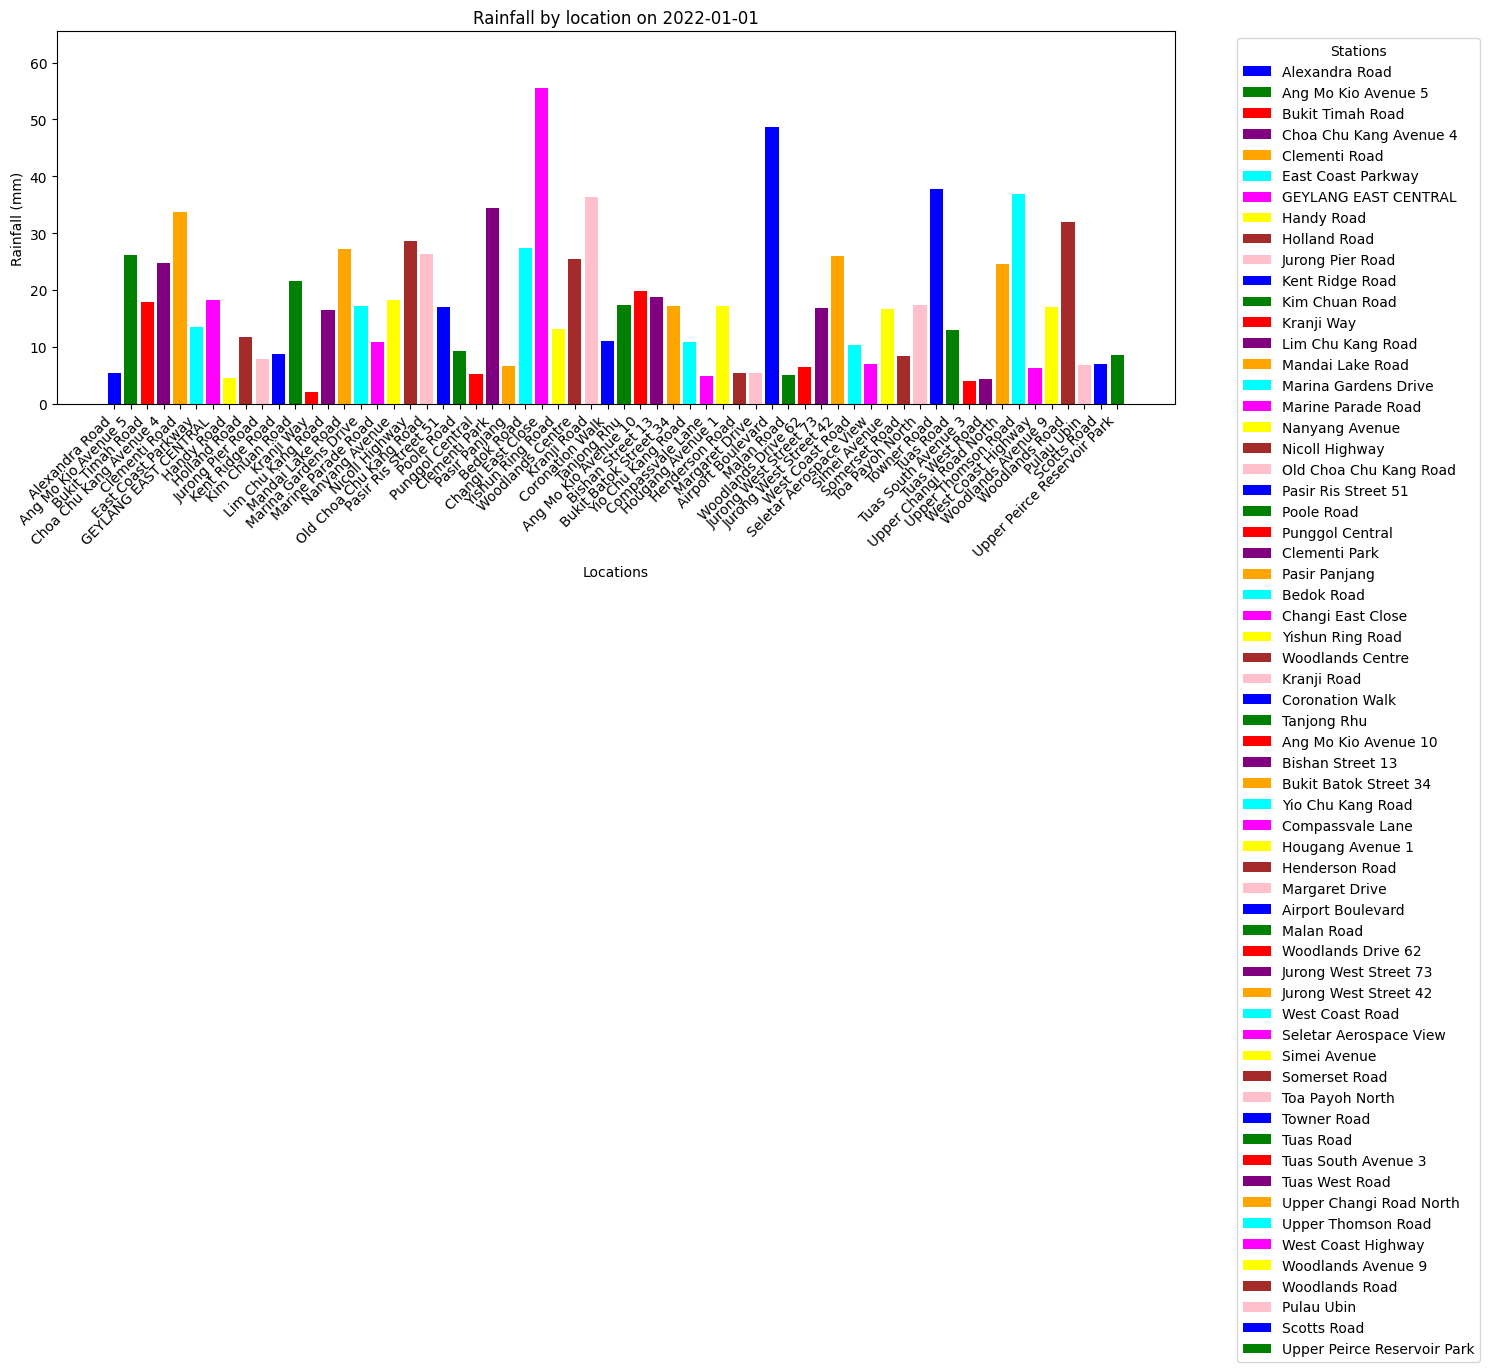

In [9]:
# Define a set of colors (can be customized)
colors = ['blue', 'green', 'red', 'purple', 'orange',
          'cyan', 'magenta', 'yellow', 'brown', 'pink']
colors = (colors * (len(locations) // len(colors) + 1))[:len(locations)]

# Plot the bar chart with station names and predefined colors
plt.figure(figsize=(12, 6))
bars = plt.bar(locations, rainfall_values, color=colors)

# Add labels and title
plt.xlabel('Locations')
plt.ylabel('Rainfall (mm)')
plt.title(f'Rainfall by location on {date}')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent label cut-off
plt.tight_layout()

# Set y-axis limits based on data range
plt.gca().set_ylim(0, max(rainfall_values) + 10)

# Add a legend with station names
plt.legend(bars, locations, title="Stations",
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [22]:
print(len(locations))
print(locations)

# SG districts: https://sharonanngoh.com/useful-info/singapore-district-guide/

district_map = {}

north_locs = ['Ang Mo Kio Avenue 5',
                'Kim Chuan Road',
                'Kranji Way',
                'Mandai Lake Road',
                'Punggol Central',
                'Yishun Ring Road',
            'Woodlands Centre',
              'Kranji Road',
              'Ang Mo Kio Avenue 10',
              'Bishan Street 13',
              'Yio Chu Kang Road',
              'Compassvale Lane',
              'Woodlands Drive 62',
              'Seletar Aerospace View',
              'Upper Thomson Road',
              'Woodlands Avenue 9',
              'Woodlands Road',
              'Upper Peirce Reservoir Park'
             ]
south_locs = ['Alexandra Road',
              'Henderson Road',
              'Margaret Drive',
              'Malan Road'
             ]
east_locs = ['East Coast Parkway',
            'GEYLANG EAST CENTRAL',
            'Marine Parade Road',
            'Pasir Ris Street 51',
            'Poole Road',
            'Bedok Road',
            'Changi East Close',
            'Tanjong Rhu',
             'Airport Boulevard',
             'Simei Avenue',
             'Upper Changi Road North',
             'Pulau Ubin'
            ]
west_locs = ['Choa Chu Kang Avenue 4',
            'Clementi Road',
            'Jurong Pier Road',
            'Kent Ridge Road',
            'Lim Chu Kang Road',
            'Nanyang Avenue',
            'Old Choa Chu Kang Road',
            'Clementi Park',
            'Pasir Panjang',
            'Bukit Batok Street 34',
             'Jurong West Street 73',
             'Jurong West Street 42',
             'West Coast Road',
             'Tuas Road',
             'West Coast Highway',
             'Tuas South Avenue 3'
            ]
city_locs = ['Marina Gardens Drive',
            'Nicoll Highway'
            ]
central_locs = ['Bukit Timah Road',
               'Handy Road',
               'Holland Road',
               'Coronation Walk',
               'Somerset Road',
               'Toa Payoh North',
                'Towner Road',
                'Scotts Road'
               ]


district_map['North'] = north_locs
district_map['South'] = south_locs
district_map['East'] = east_locs
district_map['West'] = west_locs
district_map['City'] = city_locs
district_map['Central'] = central_locs



62
['Alexandra Road', 'Ang Mo Kio Avenue 5', 'Bukit Timah Road', 'Choa Chu Kang Avenue 4', 'Clementi Road', 'East Coast Parkway', 'GEYLANG EAST CENTRAL', 'Handy Road', 'Holland Road', 'Jurong Pier Road', 'Kent Ridge Road', 'Kim Chuan Road', 'Kranji Way', 'Lim Chu Kang Road', 'Mandai Lake Road', 'Marina Gardens Drive', 'Marine Parade Road', 'Nanyang Avenue', 'Nicoll Highway', 'Old Choa Chu Kang Road', 'Pasir Ris Street 51', 'Poole Road', 'Punggol Central', 'Clementi Park', 'Pasir Panjang', 'Bedok Road', 'Changi East Close', 'Yishun Ring Road', 'Woodlands Centre', 'Kranji Road', 'Coronation Walk', 'Tanjong Rhu', 'Ang Mo Kio Avenue 10', 'Bishan Street 13', 'Bukit Batok Street 34', 'Yio Chu Kang Road', 'Compassvale Lane', 'Hougang Avenue 1', 'Henderson Road', 'Margaret Drive', 'Airport Boulevard', 'Malan Road', 'Woodlands Drive 62', 'Jurong West Street 73', 'Jurong West Street 42', 'West Coast Road', 'Seletar Aerospace View', 'Simei Avenue', 'Somerset Road', 'Toa Payoh North', 'Towner Road

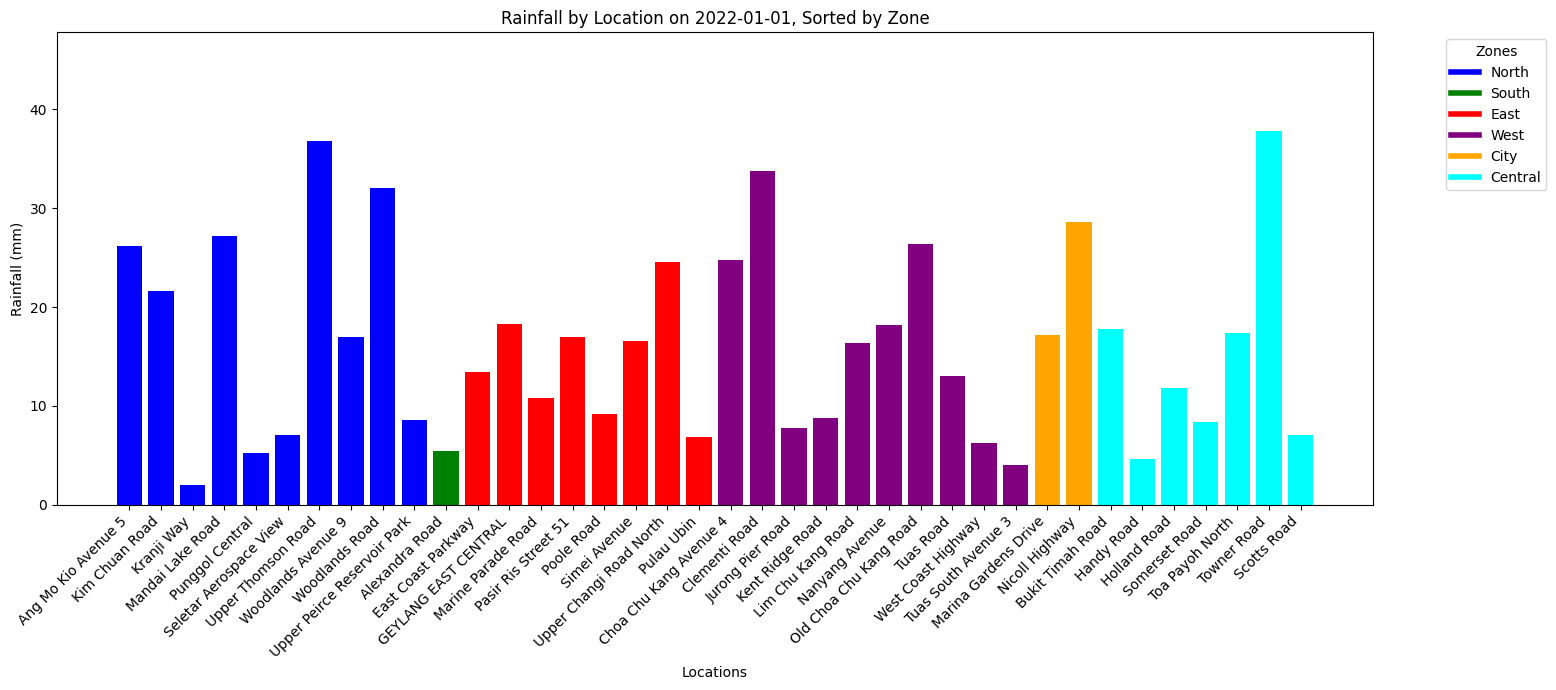

In [24]:
zone_color_map = {
    'North': 'blue',
    'South': 'green',
    'East': 'red',
    'West': 'purple',
    'City': 'orange',
    'Central': 'cyan'
}

# Prepare lists for zones, locations, and rainfall values
zone_locations = []
zone_rainfall = []
zone_colors = []

# Sort data by zones and organize for plotting
for zone, locations in district_map.items():
    for location in locations:
        for station in station_dict.values():
            if station[0] == location:
                zone_locations.append(location)
                zone_rainfall.append(station[1])
                zone_colors.append(zone_color_map[zone])
                break

# Plot the bar chart sorted by zones with color coding
plt.figure(figsize=(14, 7))
bars = plt.bar(zone_locations, zone_rainfall, color=zone_colors)

# Add labels and title
plt.xlabel('Locations')
plt.ylabel('Rainfall (mm)')
plt.title(f'Rainfall by Location on {date}, Sorted by Zone')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Set y-axis limits based on data range
plt.gca().set_ylim(0, max(zone_rainfall) + 10)

# Add a legend for zones
legend_elements = [plt.Line2D([0], [0], color=zone_color_map[zone], lw=4, label=zone) for zone in district_map.keys()]
plt.legend(handles=legend_elements, title="Zones", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()